## Importación de librerias y lectura csv ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\augus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [61]:
df = pd.read_csv("1000_Companies.csv")
df

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [4]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [5]:
colors = {
    'New York': '#A8A77A',
    'California': '#EE8130',
    'Florida': '#6390F0',
}

## Análisis de estadísticas ##

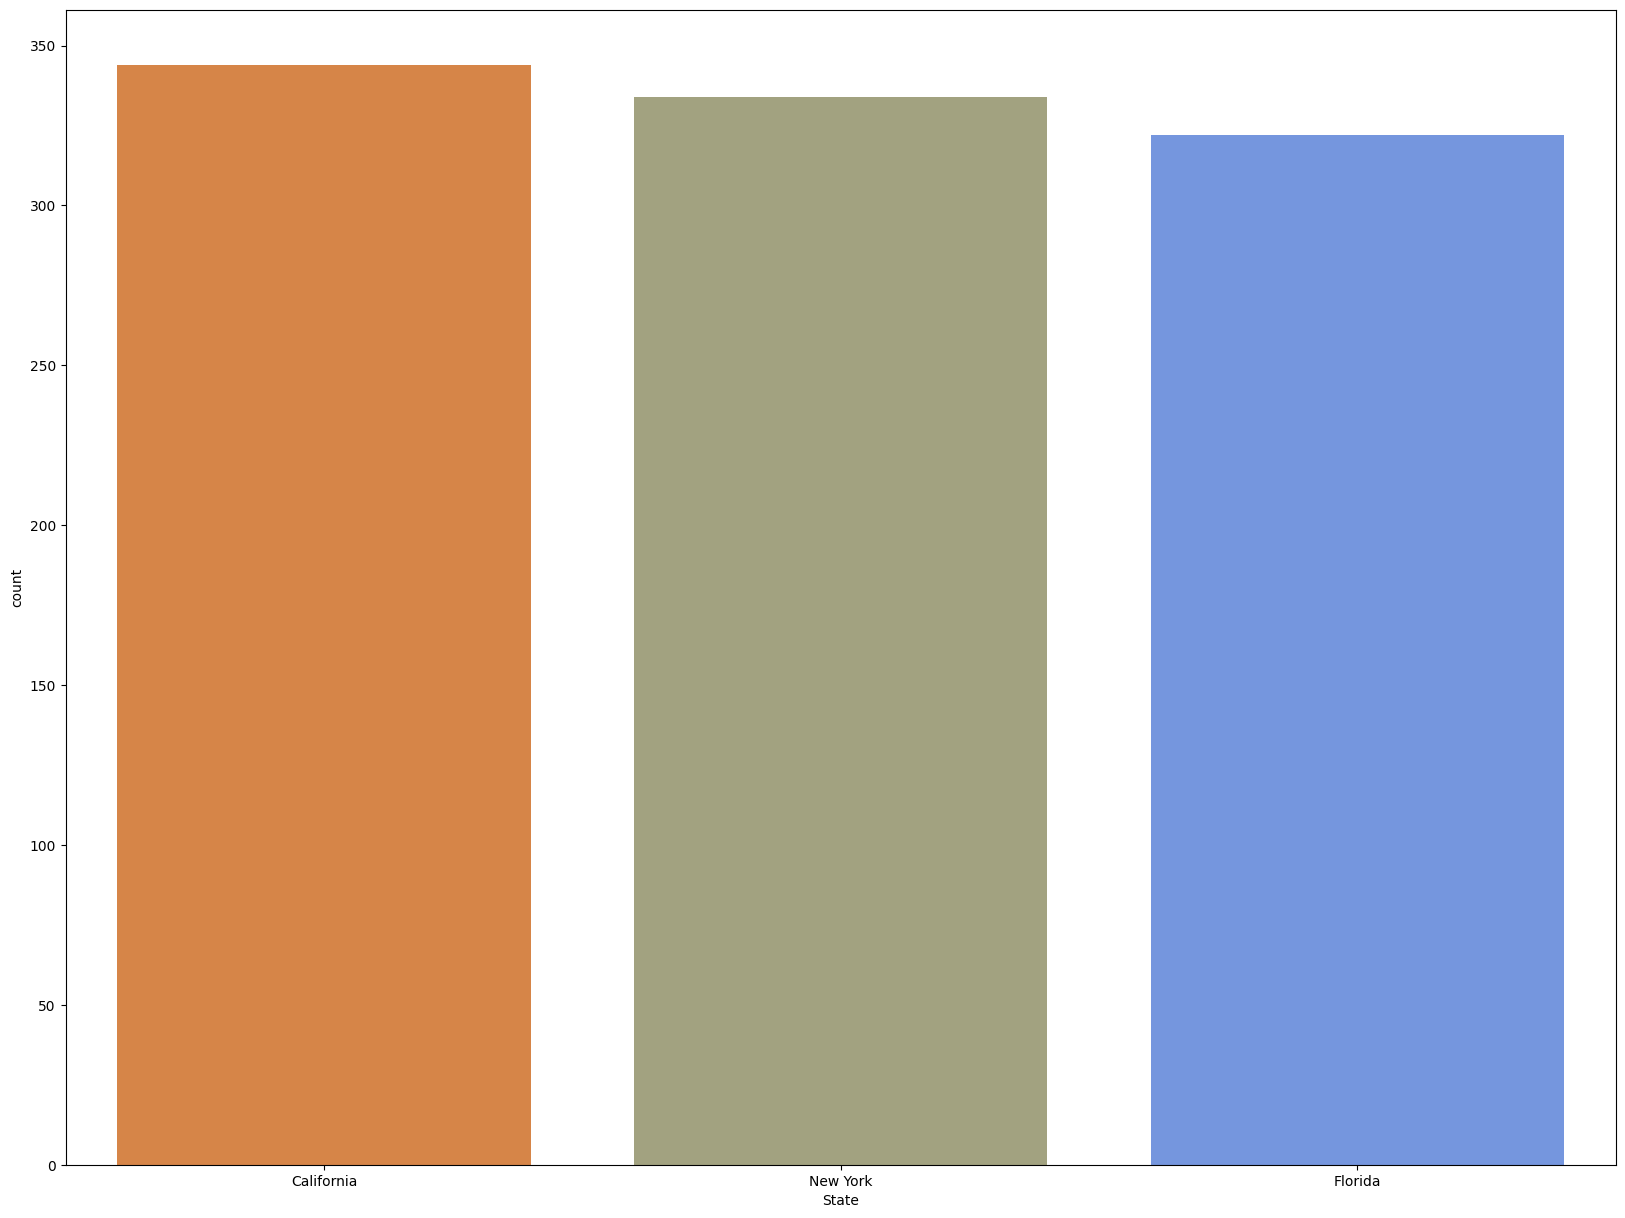

In [6]:
plt.figure(figsize=(20, 15))
sns.countplot(x='State', data=df, palette=colors, order=df['State'].value_counts().index)
# plt.xticks(rotation=-45)
plt.show()

Vemos que el dataset tiene una distribución balanceada

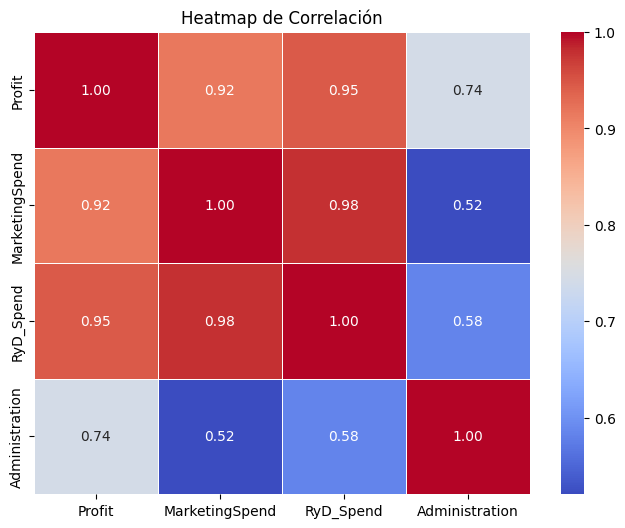

In [7]:
# Filtra las columnas de interés
columns_of_interest = ["Profit", "MarketingSpend", "RyD_Spend", "Administration"]
df_subset = df[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = df_subset.corr()

# Crea un heatmap de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()

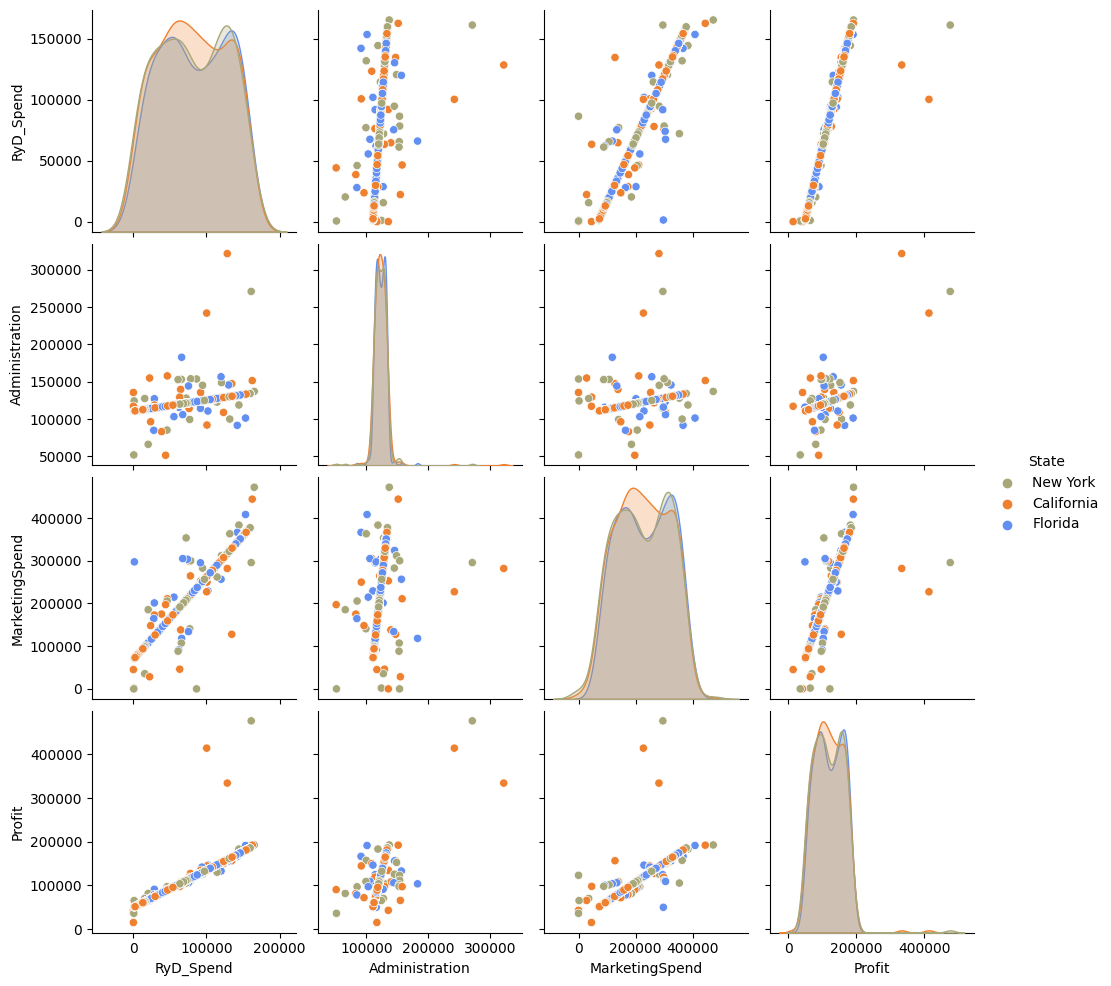

In [8]:
sns.pairplot(df, hue="State", palette=colors)

RyD_Spend

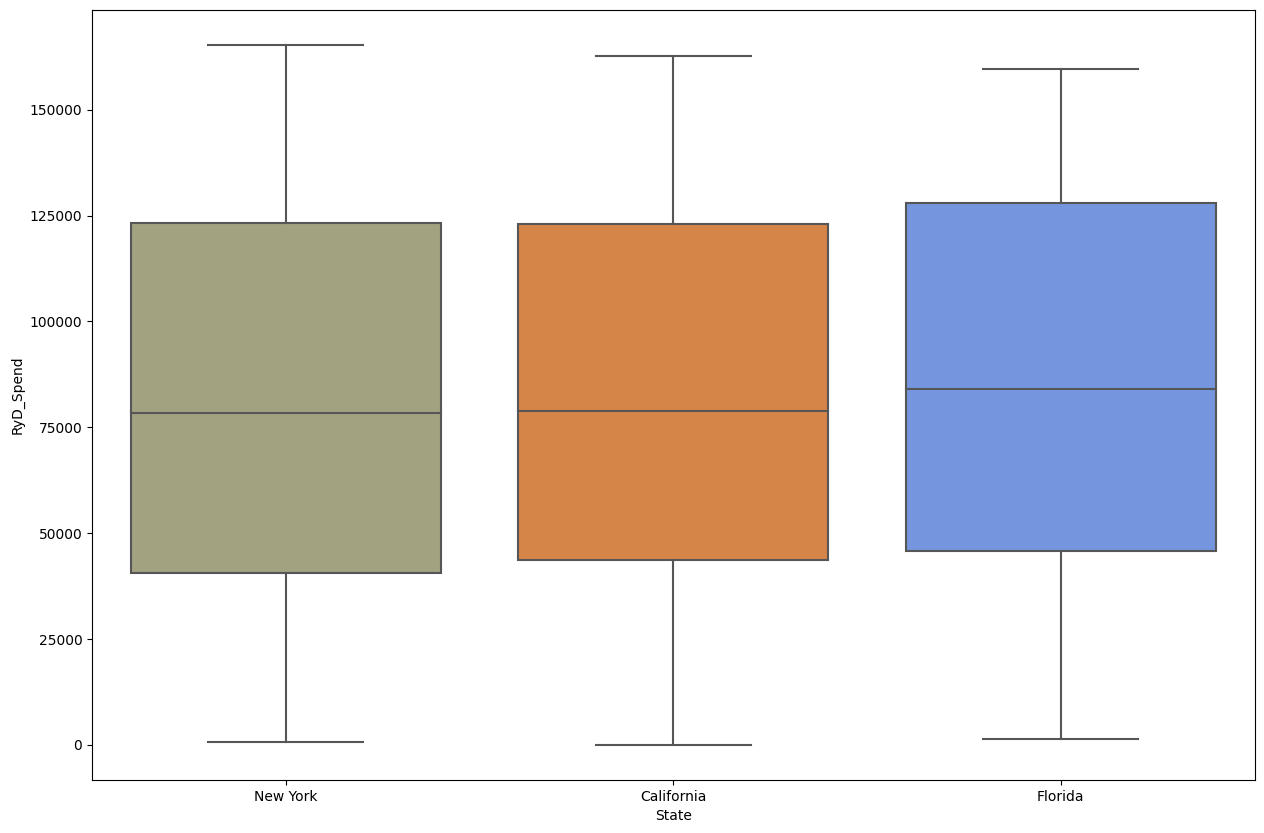

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State', y='RyD_Spend', data=df, palette=colors)
# plt.xticks(rotation=90)
plt.show()

Administration

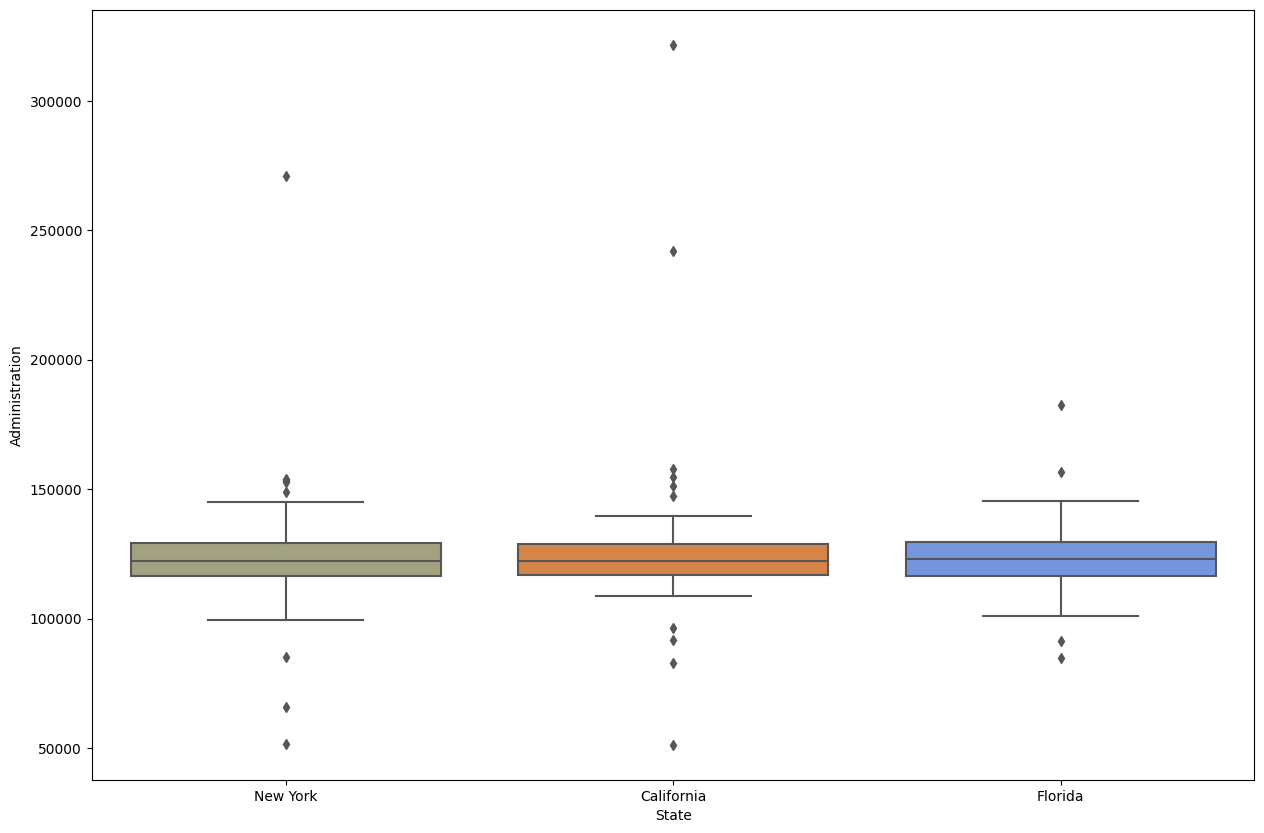

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State', y='Administration', data=df, palette=colors)
# plt.xticks(rotation=90)
plt.show()

MarketingSpend

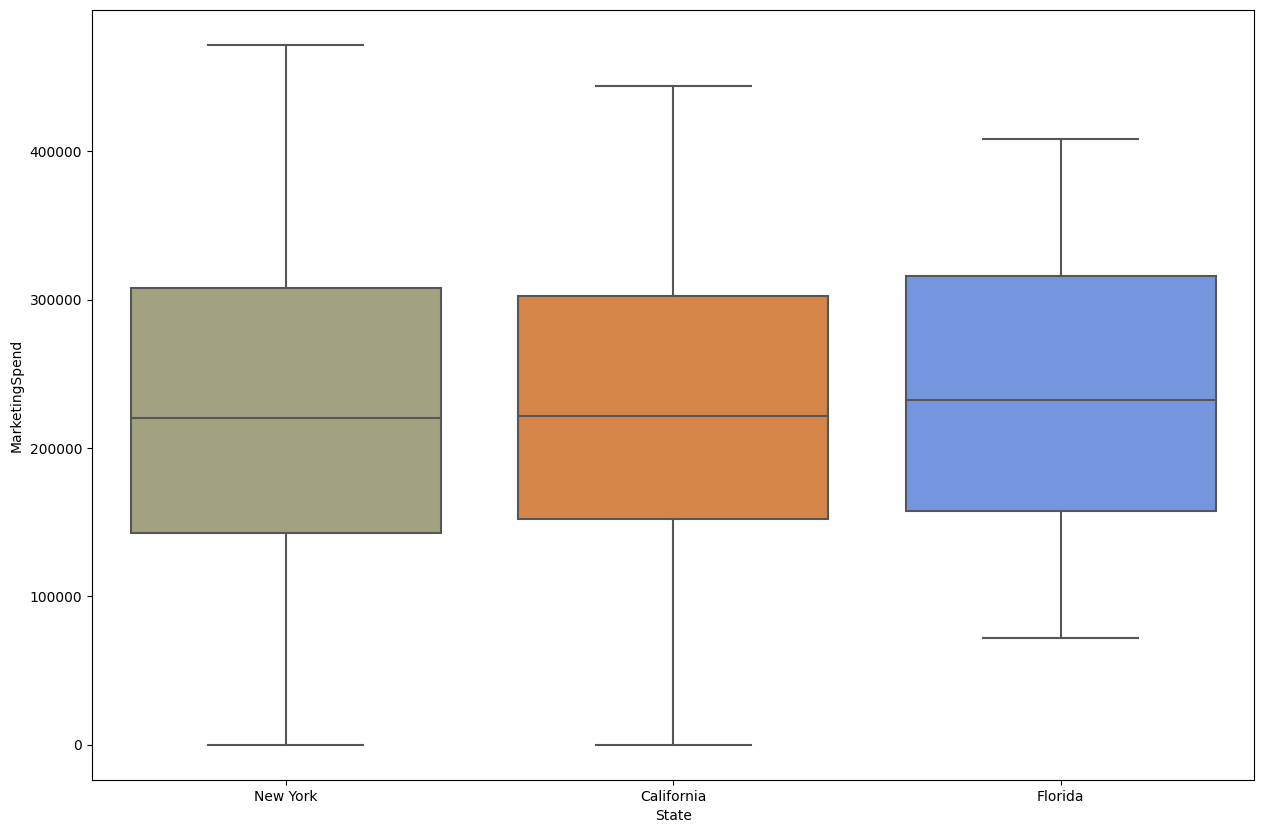

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State', y='MarketingSpend', data=df, palette=colors)
plt.show()

Profit

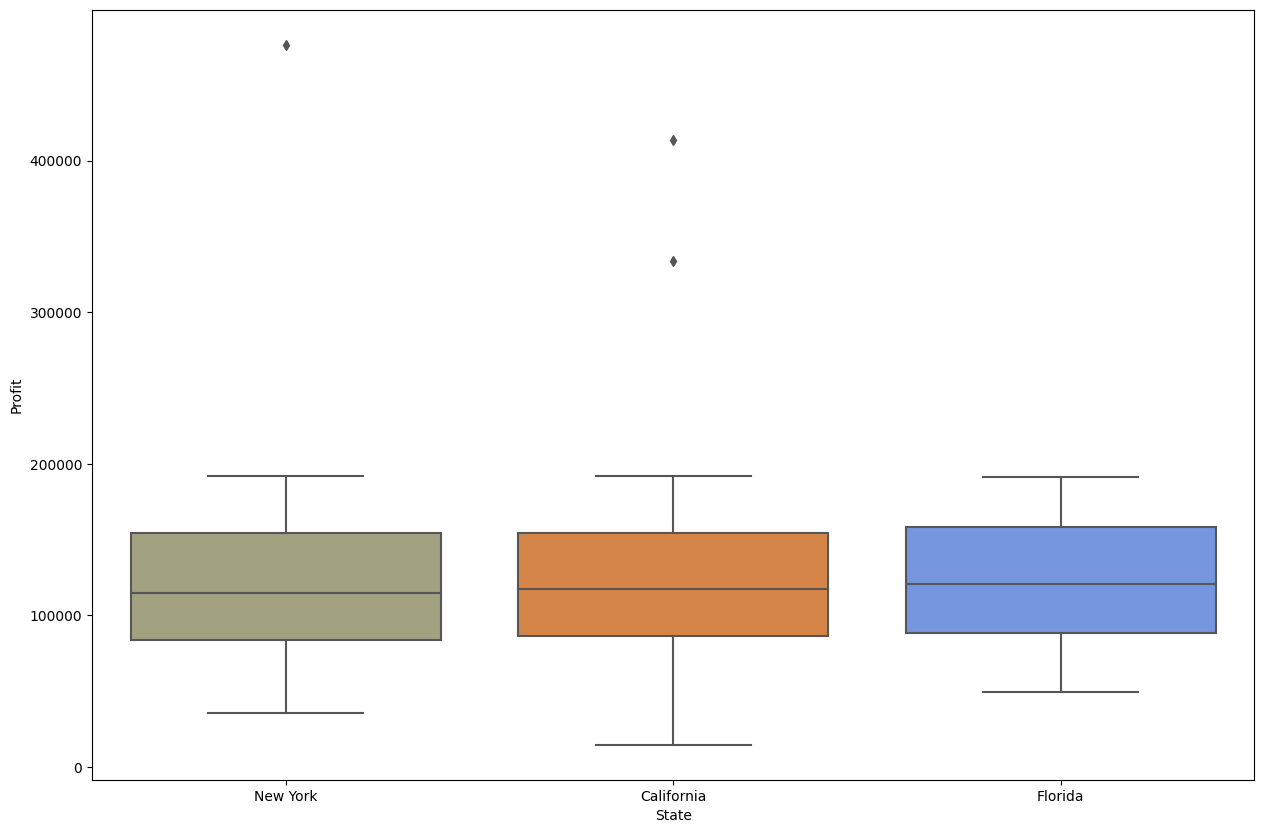

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State', y='Profit', data=df, palette=colors)
plt.show()

Observamos que las 

## Regression Tree

In [13]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from graphviz import Source
from sklearn.preprocessing import StandardScaler

In [62]:
df = pd.get_dummies(df, columns=["State"], drop_first=True)

In [63]:
df

,RyD_Spend,Administration,MarketingSpend,Profit,State_Florida,State_New York
0,165349.20,136897.800,471784.1000,192261.83000,0,1
1,162597.70,151377.590,443898.5300,191792.06000,0,0
2,153441.51,101145.550,407934.5400,191050.39000,1,0
3,144372.41,118671.850,383199.6200,182901.99000,0,1
4,142107.34,91391.770,366168.4200,166187.94000,1,0
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,0,0
996,134970.00,130390.080,329204.0228,164336.60550,0,0
997,100275.47,241926.310,227142.8200,413956.48000,0,0
998,128456.23,321652.140,281692.3200,333962.19000,0,0


In [64]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
columnas = ["RyD_Spend", "Administration","MarketingSpend"]
# Crea un objeto StandardScaler
scaler = StandardScaler()

# Aplica la estandarización a las columnas numéricas
df[columnas] = scaler.fit_transform(df[columnas])

In [65]:
df

,RyD_Spend,Administration,MarketingSpend,Profit,State_Florida,State_New York
0,1.799023,1.105197,2.682968,192261.83000,0,1
1,1.739869,2.253692,2.378316,191792.06000,0,0
2,1.543022,-1.730568,1.985407,191050.39000,1,0
3,1.348048,-0.340433,1.715177,182901.99000,0,1
4,1.299351,-2.504210,1.529110,166187.94000,1,0
...,...,...,...,...,...,...
995,-0.591946,-0.357871,-0.578727,95279.96251,0,0
996,1.145907,0.589023,1.125271,164336.60550,0,0
997,0.400018,9.435756,0.010245,413956.48000,0,0
998,1.005869,15.759379,0.606202,333962.19000,0,0


In [66]:
""" Decision Tree - Regression with test size 20% """

xCompanies = df.drop('Profit', axis=1)
yCompanies = df['Profit']
xTrain, xTest, yTrain, yTest = train_test_split(xCompanies, yCompanies, test_size=0.2)

tree_reg = tree.DecisionTreeRegressor(max_depth=5, criterion='squared_error', random_state=13, min_samples_leaf=1, min_samples_split=2)

regressor_tree = tree_reg.fit(xTrain, yTrain)
yCompaniesPred = tree_reg.predict(xTest)

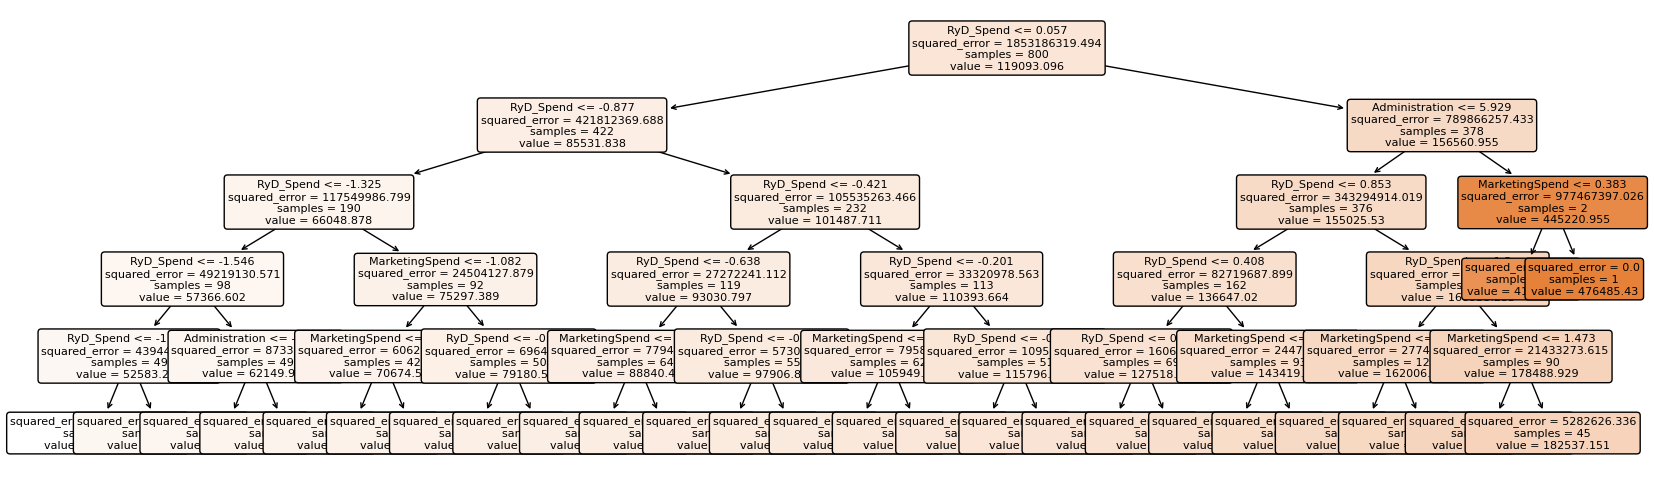

In [67]:
feature_list = list(xTrain.columns)
features = feature_list

plt.figure(figsize=(20,6))
tree.plot_tree(regressor_tree,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

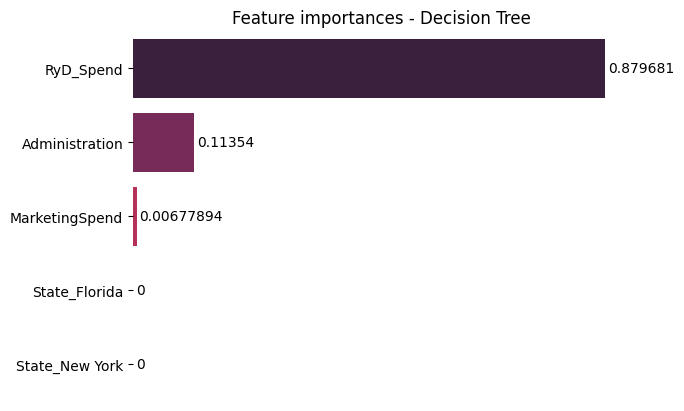

In [68]:
#Creamos un DF con dos columnas -> Caracteristica y ganacia de informacion
features_df = pd.DataFrame({'features': feature_list, 'importances': regressor_tree.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)

g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [90]:
""" Decision Tree - Regression with test size 30% """

xCompanies = df.drop('Profit', axis=1)
yCompanies = df['Profit']
xTrain_30, xTest_30, yTrain_30, yTest_30 = train_test_split(xCompanies, yCompanies, test_size=0.3)

tree_reg_30 = tree.DecisionTreeRegressor(max_depth=5, criterion='squared_error', random_state=13, min_samples_leaf=1, min_samples_split=2)

regressor_tree_30 = tree_reg.fit(xTrain, yTrain)
yCompaniesPred_30 = tree_reg.predict(xTest_30)

Mejores hiperparámetros: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}


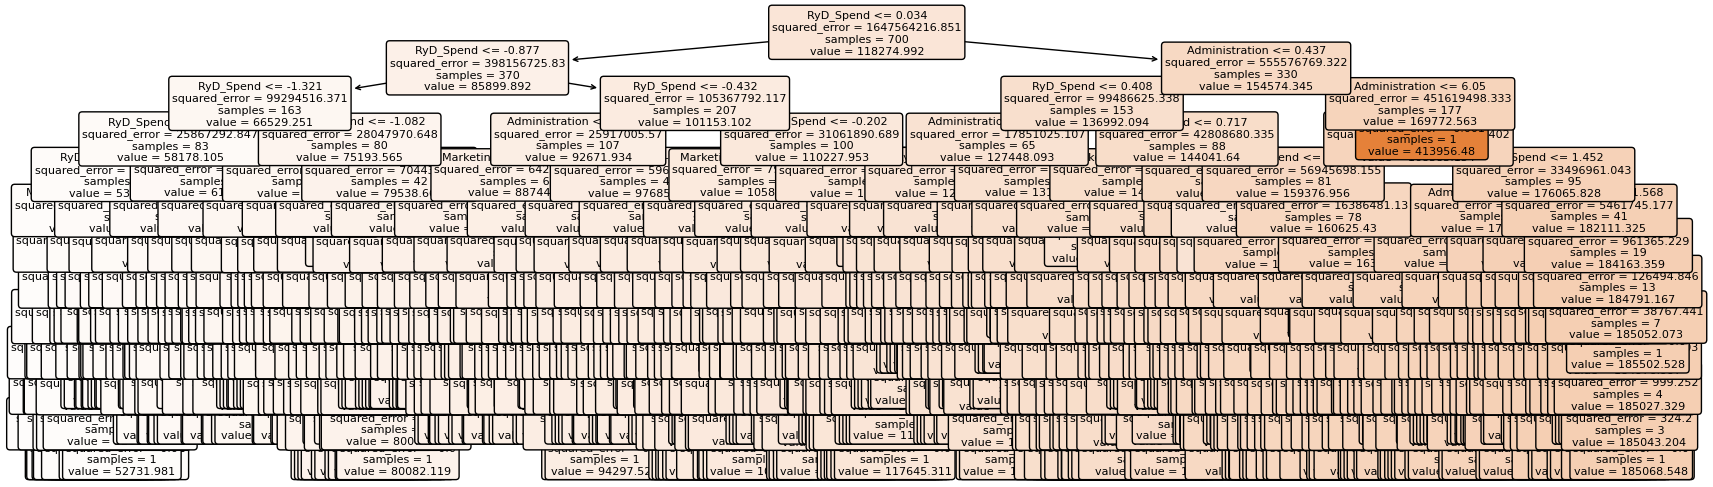

In [101]:
param_grid = {
    'max_depth': [x for x in range(5, 16)],
    'min_samples_leaf': [x for x in range(1, 11)],
    'min_samples_split': [2, 5, 10],
}

tree_clf = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(tree_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(xTrain_30, yTrain_30)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

best_tree_clf = DecisionTreeRegressor(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], random_state=42)
best_tree_clf.fit(xTrain_30, yTrain_30)

plt.figure(figsize=(20,15))
tree.plot_tree(best_tree_clf,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

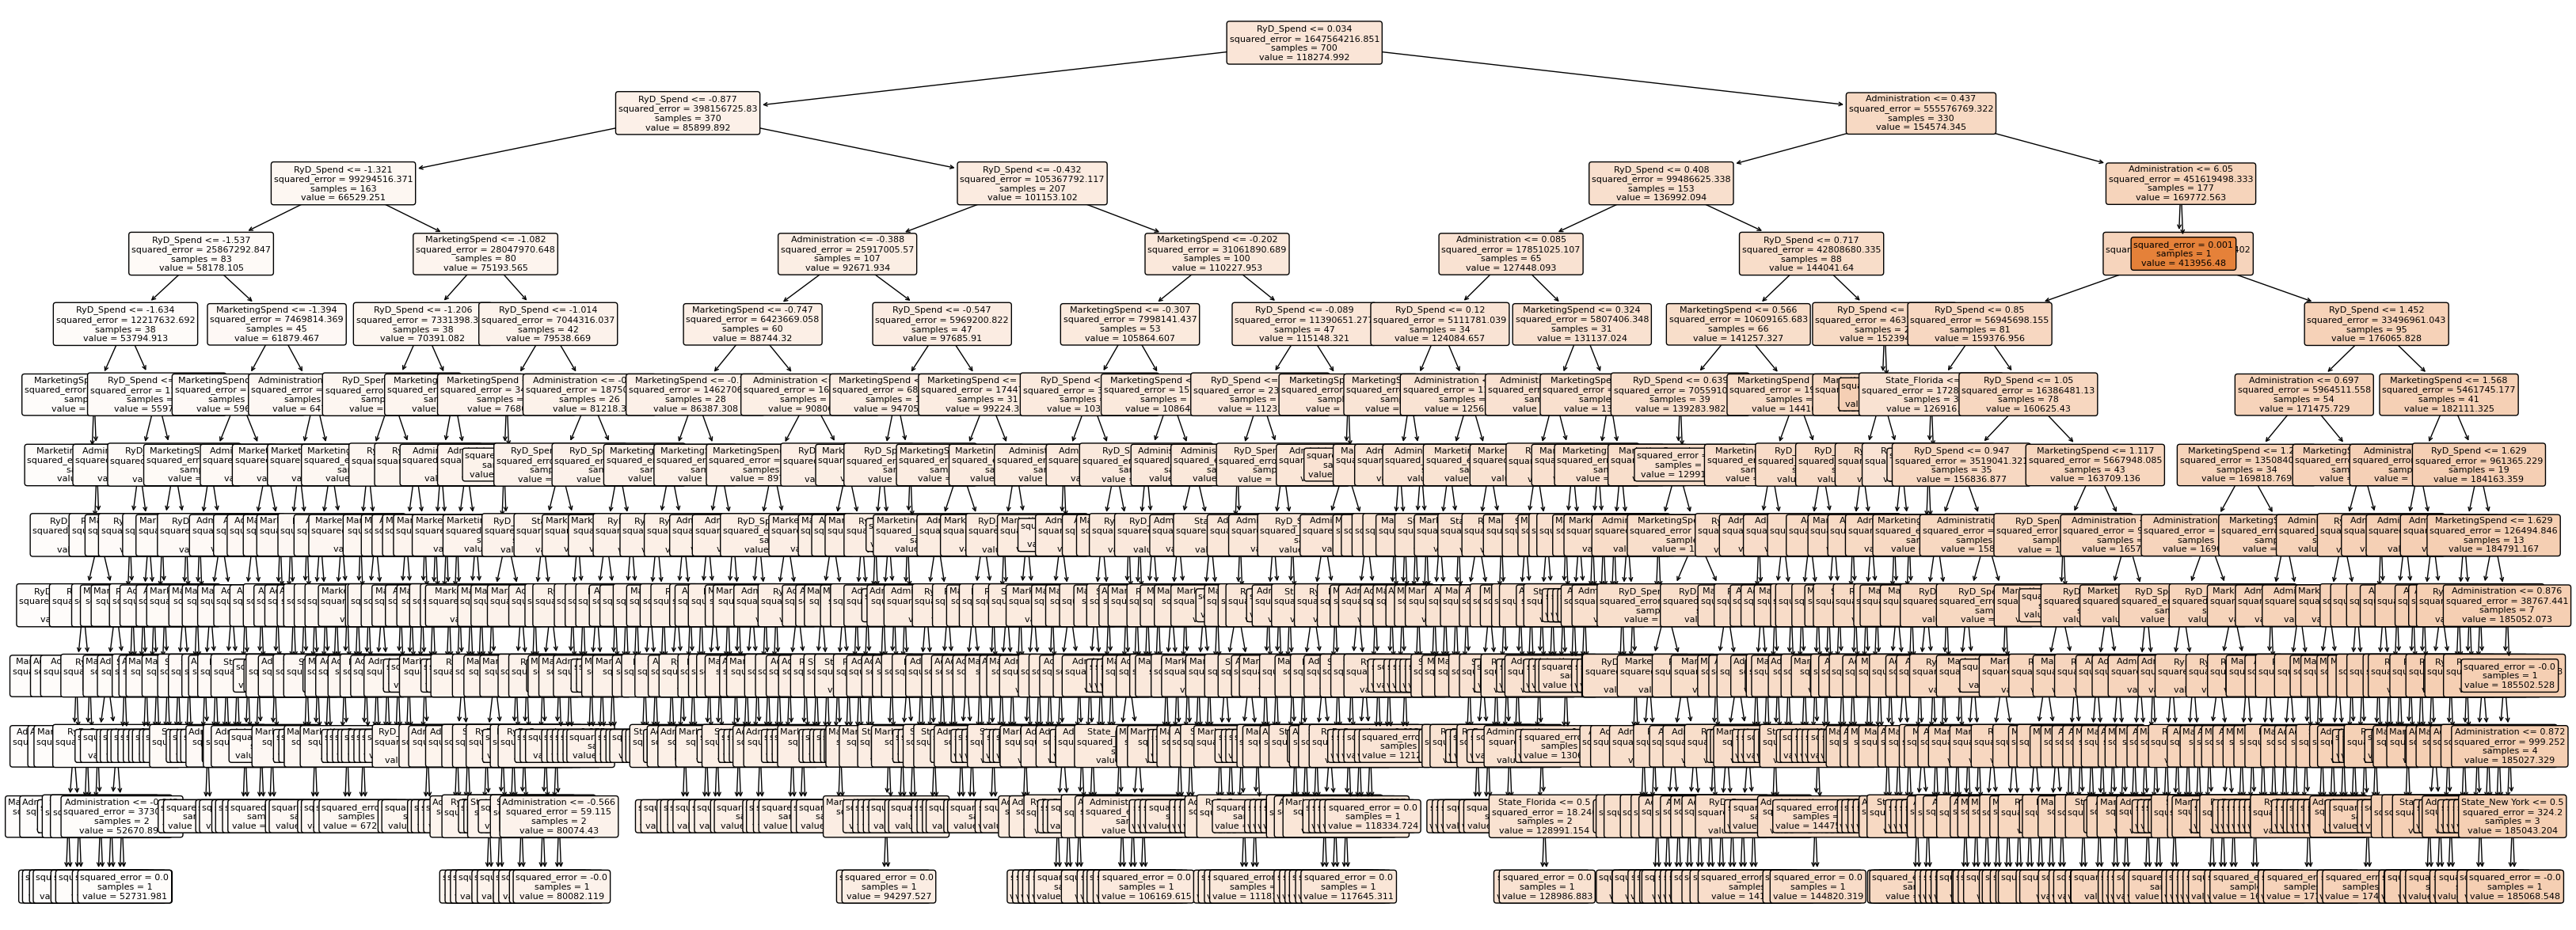

In [103]:
plt.figure(figsize=(40,15))
tree.plot_tree(best_tree_clf,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

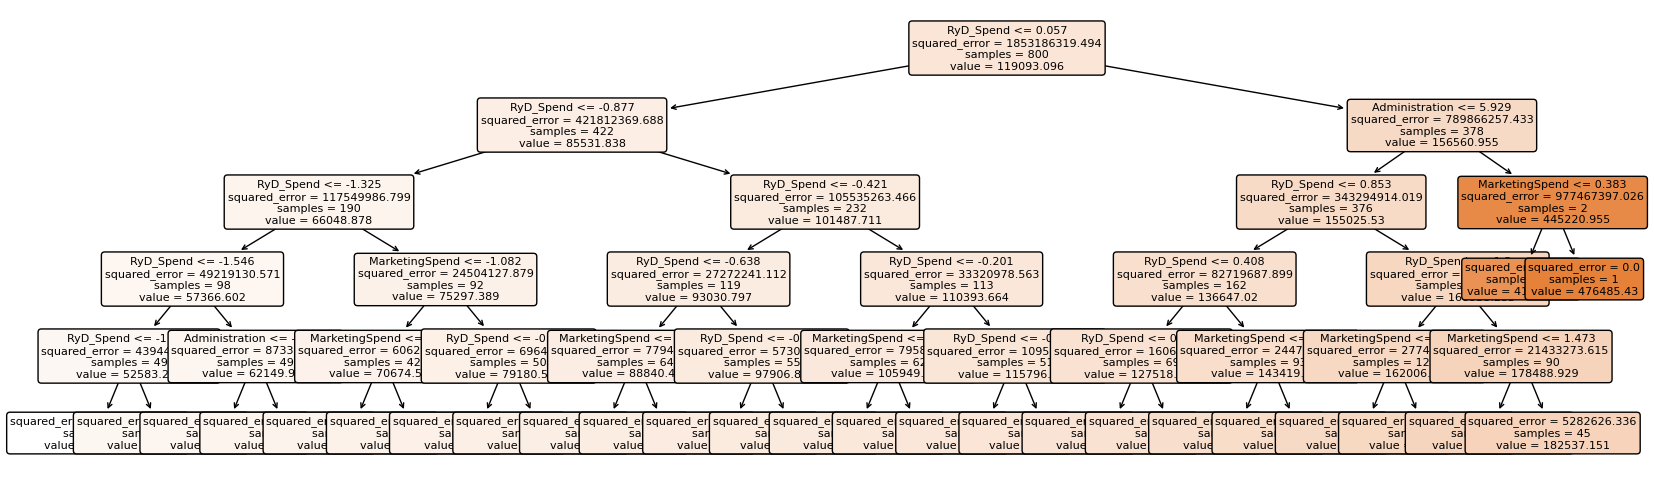

In [92]:
plt.figure(figsize=(20,6))
tree.plot_tree(regressor_tree_30,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

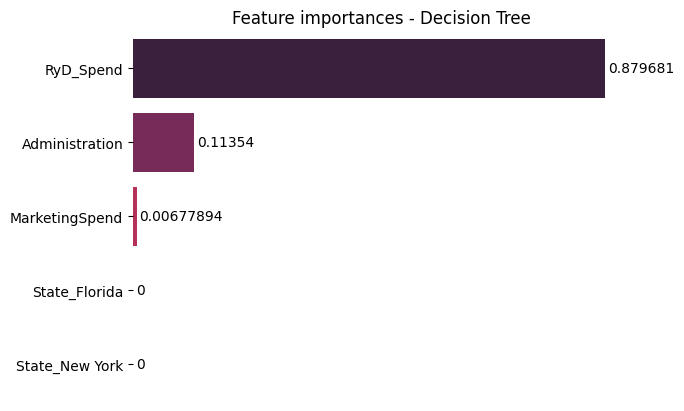

In [93]:
#Creamos un DF con dos columnas -> Caracteristica y ganacia de informacion
features_df_30 = pd.DataFrame({'features': feature_list, 'importances': regressor_tree_30.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted_30 = features_df_30.sort_values(by='importances', ascending=False)

g = sns.barplot(data=features_df_sorted_30, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)

g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [94]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error

#Poner mas opciones

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(xTrain, yTrain)
best_params = grid_search.best_params_
print("Con test size 20%")
print("Mejores hiperparámetros:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xTest)

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(yTest, y_pred)
print("Error cuadrático medio (MSE) en el conjunto de prueba:", mse)


grid_search_30 = GridSearchCV(tree_reg_30, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_30.fit(xTrain, yTrain)
best_params_30 = grid_search_30.best_params_
print("\nCon test size 30%")
print("Mejores hiperparámetros:", best_params_30)
best_model_30 = grid_search_30.best_estimator_
y_pred_30 = best_model_30.predict(xTest_30)

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(yTest_30, y_pred_30)
print("Error cuadrático medio (MSE) en el conjunto de prueba:", mse)

Con test size 20%
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Error cuadrático medio (MSE) en el conjunto de prueba: 106892111.9240016

Con test size 30%
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Error cuadrático medio (MSE) en el conjunto de prueba: 69467446.4121878


In [100]:
#Cambiar esto para que lo haga con el nuevo arbol

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test = yTest.astype(float)

mae = mean_absolute_error(yTest, yCompaniesPred)
mse = mean_squared_error(yTest, yCompaniesPred)
rmse = np.sqrt(mse)
r2 = r2_score(yTest, yCompaniesPred) # medida de la bondad de ajuste del modelo

#primero calculamos el error absoluto porcentual (APE) para cada predicción y luego calculamos el MAPE promediando estos errores.
mape = np.mean(np.abs((yTest - yCompaniesPred) / y_test) * 100)
# Calcular R-squared adjusted (R2 ajustado)
n = len(yTest)  # Número de observaciones
p = len(feature_list)  # Número de predictores (variables independientes)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # tiene en cuenta la complejidad del modelo al penalizar el uso excesivo de predictores
rmse = np.sqrt(mse)

# Imprimir MAPE
print("Con test size %20")
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("R-squared adjusted (R2 ajustado):", r2_adjusted)
print("Root Mean Squared Error (RMSE):", rmse)

#____________________test_size 30%

y_test_30 = yTest_30.astype(float)

mae = mean_absolute_error(yTest_30, yCompaniesPred_30)
mse = mean_squared_error(yTest_30, yCompaniesPred_30)
rmse = np.sqrt(mse)
r2 = r2_score(yTest_30, yCompaniesPred_30) # medida de la bondad de ajuste del modelo

#primero calculamos el error absoluto porcentual (APE) para cada predicción y luego calculamos el MAPE promediando estos errores.
mape = np.mean(np.abs((yTest_30 - yCompaniesPred_30) / y_test_30) * 100)
# Calcular R-squared adjusted (R2 ajustado)
n = len(yTest_30)  # Número de observaciones
p = len(feature_list)  # Número de predictores (variables independientes)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # tiene en cuenta la complejidad del modelo al penalizar el uso excesivo de predictores
rmse = np.sqrt(mse)

# Imprimir MAPE
print("\nCon test size %30")
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("R-squared adjusted (R2 ajustado):", r2_adjusted)
print("Root Mean Squared Error (RMSE):", rmse)

Con test size %20
Mean Absolute Percentage Error (MAPE): 2.1100041329205053
Mean Absolute Error (MAE): 2766.3033896323877
Mean Squared Error (MSE): 110619146.59894373
Root Mean Squared Error (RMSE): 10517.563719747255
R-squared (R2): 0.9375430637809262
R-squared adjusted (R2 ajustado): 0.9359333489299192
Root Mean Squared Error (RMSE): 10517.563719747255

Con test size %30
Mean Absolute Percentage Error (MAPE): 2.149945132118102
Mean Absolute Error (MAE): 2478.3515072550426
Mean Squared Error (MSE): 75172407.25877342
Root Mean Squared Error (RMSE): 8670.20226169917
R-squared (R2): 0.966861537901468
R-squared adjusted (R2 ajustado): 0.966297958614078
Root Mean Squared Error (RMSE): 8670.20226169917


In [99]:
#Sacar los ploteos con el arbol sin los mejores hiperparam
#Plotear desps de hiper


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(test_labels, clf_predictions)
precision = precision_score(test_labels, clf_predictions, average='macro')
recall = recall_score(test_labels, clf_predictions, average='macro')
f1 = f1_score(test_labels, clf_predictions, average='macro')
confusion = confusion_matrix(test_labels, clf_predictions)

print(f'Accuracy: {accuracy},\n\nPrecision: {precision},\n\nRecall: {recall},\n\nF1 {f1}')

In [96]:
tableResult = pd.DataFrame({'Actual':yTest, 'Predicted':yCompaniesPred})
tableResult

,Actual,Predicted
86,166598.7690,166437.779343
524,151804.1511,148546.955031
303,173336.5651,174440.708196
137,173343.3994,174440.708196
36,90708.1900,77223.905560
...,...,...
901,116260.5043,118344.215859
827,170465.2918,174440.708196
612,126058.3720,124184.879982
954,129642.9786,130756.917246
